In [146]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### Voy ha realizar un pequeño EDA sobre la cuesta de satisfacción, descargo el csv de train y test para poder visualizar columnas y filas el train tiene 103904 fila y 25 columnas

In [147]:
df_train = pd.read_csv('../data/raw/train.csv',index_col=0)

df_train.shape

(103904, 24)

In [148]:
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [149]:
df_train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### En el csv de test tiene 25976 filas y 25 columnas

In [150]:
df_test = pd.read_csv('../data/raw/test.csv',index_col=0)
df_test.shape

(25976, 24)

### No tiene duplicados por id, y elimino la columna Id ya que no quiero que la aprenda

In [151]:
df_train.id.duplicated().drop_duplicates()

0    False
Name: id, dtype: bool

In [152]:
df_train = df_train.drop(columns=['id', 'Gender'])

In [153]:
df_test= df_test.drop(columns=['id', 'Gender'])

Veo que Arrival Delay in minutes es un float, lo voy a pasar a int pero no me deja porque tiene nan, los voy a eliminar para ver cuantas filas me quedan, solo se pierde 310 filas

In [154]:
df_train.dtypes

Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

In [155]:
df_test.dtypes

Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfaction                          object
dtype: obj

In [156]:
df_train = df_train.dropna()

In [157]:
df_test = df_test.dropna()

solo he perdido 310

In [158]:
df_train.shape

(103594, 22)

In [159]:
df_test.shape

(25893, 22)

#### Cambio de float a int Arrival Delay in minutes

In [160]:
df_train['Arrival Delay in Minutes'] = pd.to_numeric(df_train['Arrival Delay in Minutes'],errors= 'ignore', downcast= 'integer')  
df_train['Arrival Delay in Minutes']

0         18
1          6
2          0
3          9
4          0
          ..
103899     0
103900     0
103901    14
103902     0
103903     0
Name: Arrival Delay in Minutes, Length: 103594, dtype: int16

In [161]:
df_test['Arrival Delay in Minutes'] = pd.to_numeric(df_test['Arrival Delay in Minutes'],errors= 'ignore', downcast= 'integer')  
df_test['Arrival Delay in Minutes']

0        44
1         0
2         0
3         6
4        20
         ..
25971     0
25972     0
25973     0
25974     0
25975     0
Name: Arrival Delay in Minutes, Length: 25893, dtype: int16

In [162]:
df_train['Age'].describe().round(2)

count    103594.00
mean         39.38
std          15.11
min           7.00
25%          27.00
50%          40.00
75%          51.00
max          85.00
Name: Age, dtype: float64

In [233]:
df_train['Age'].median().__round__(2)

40.0

In [163]:
df_train['Flight Distance'].describe().round(2)

count    103594.00
mean       1189.33
std         997.30
min          31.00
25%         414.00
50%         842.00
75%        1743.00
max        4983.00
Name: Flight Distance, dtype: float64

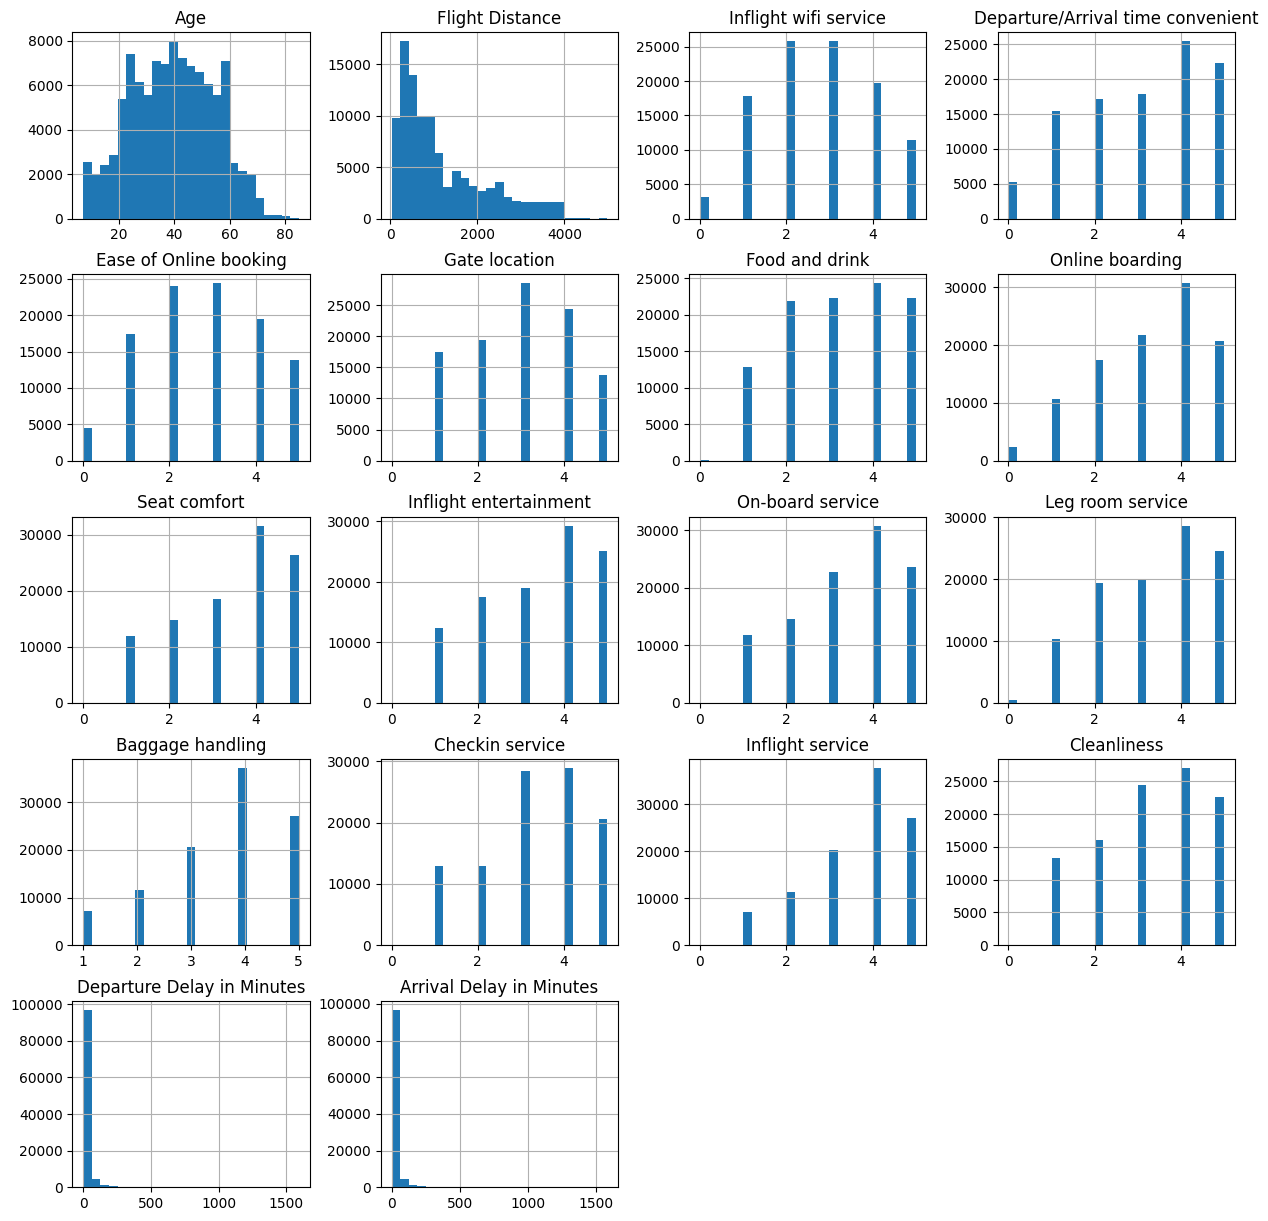

In [164]:

df_train.hist(figsize=(15,15), bins=25);

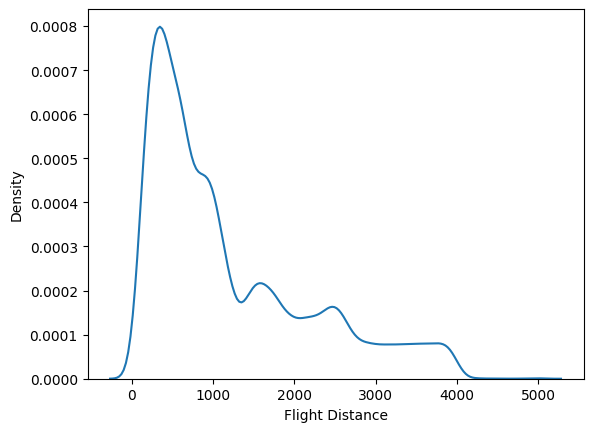

In [166]:
sns.kdeplot(df_train['Flight Distance']);

### Se ve una correlación entre las columnas de retraso en minutos de salida y retraso en la llegada 

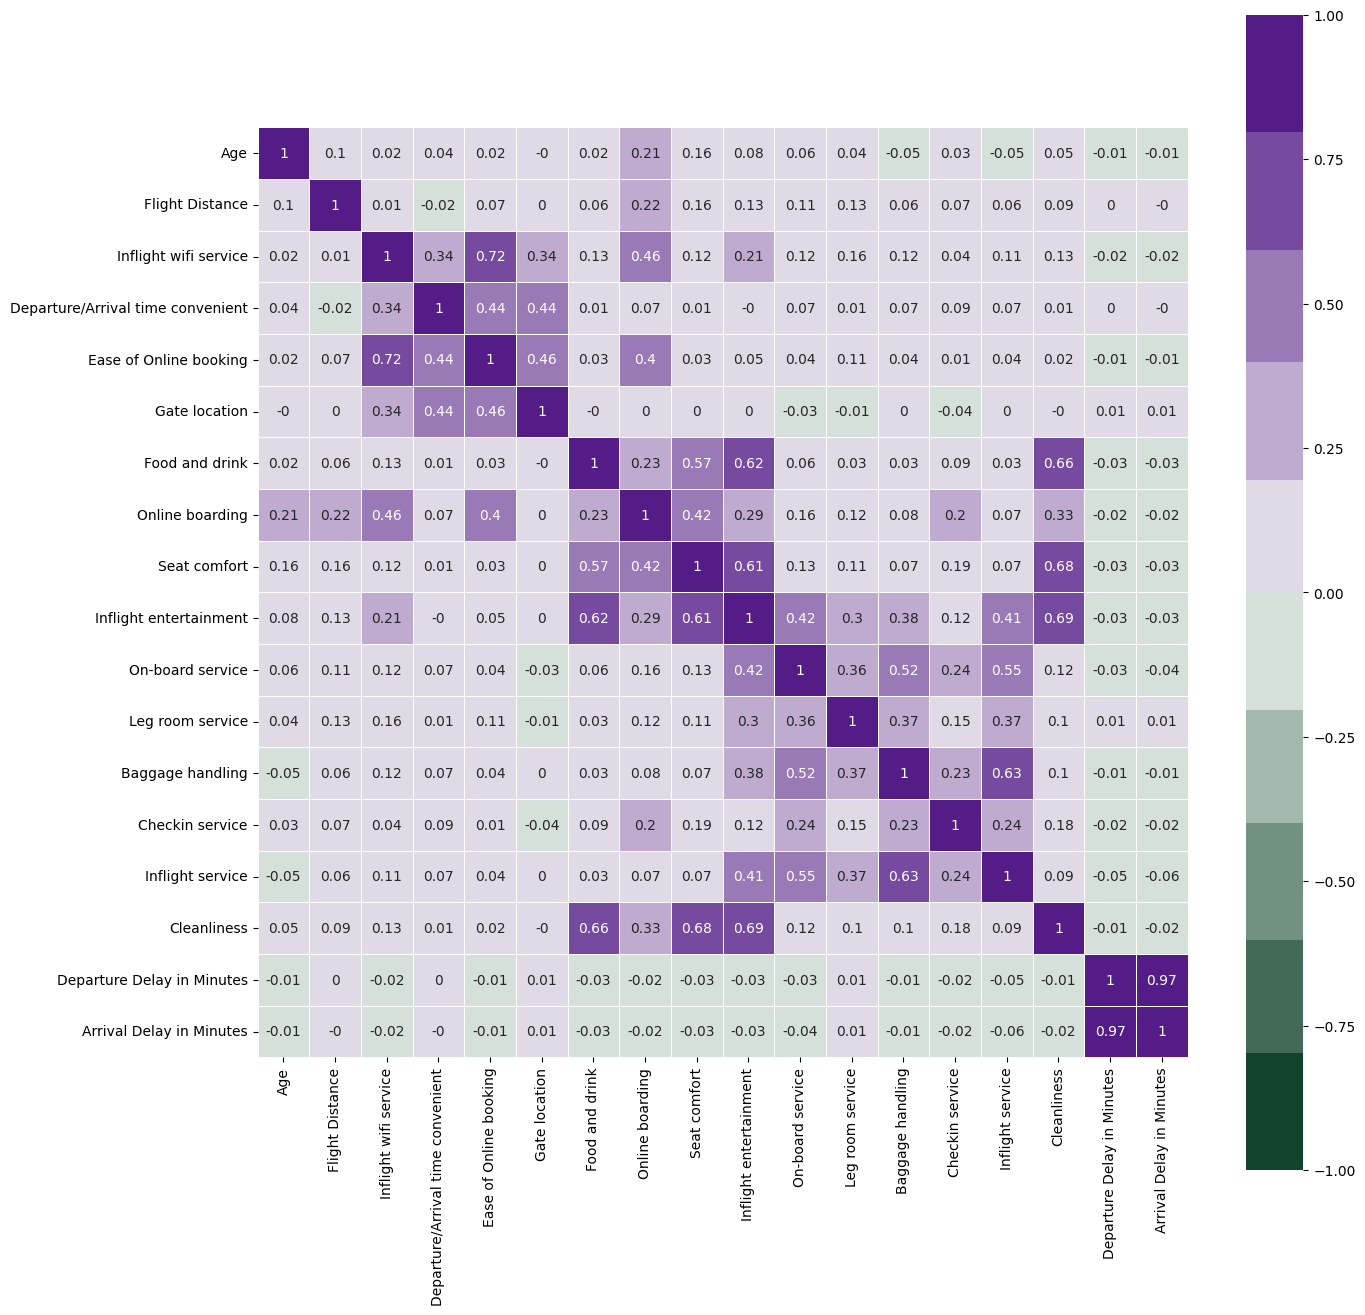

In [167]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train[2:].corr().round(2),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

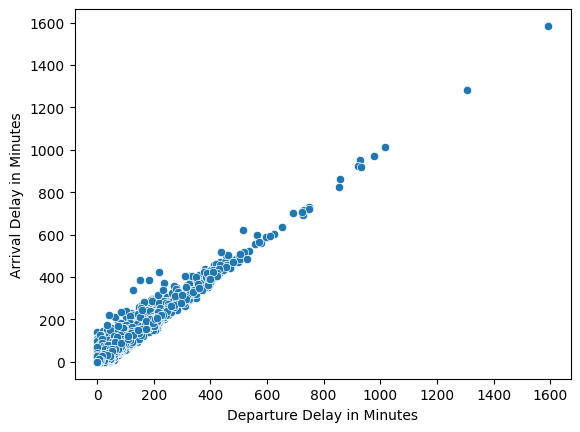

In [168]:
sns.scatterplot(x=df_train["Departure Delay in Minutes"], y=df_train["Arrival Delay in Minutes"],sizes=(20, 2000));

No hay nulos

In [169]:
df_train.isnull().count()

Customer Type                        103594
Age                                  103594
Type of Travel                       103594
Class                                103594
Flight Distance                      103594
Inflight wifi service                103594
Departure/Arrival time convenient    103594
Ease of Online booking               103594
Gate location                        103594
Food and drink                       103594
Online boarding                      103594
Seat comfort                         103594
Inflight entertainment               103594
On-board service                     103594
Leg room service                     103594
Baggage handling                     103594
Checkin service                      103594
Inflight service                     103594
Cleanliness                          103594
Departure Delay in Minutes           103594
Arrival Delay in Minutes             103594
satisfaction                         103594
dtype: int64

## Estan balanceados los datos

In [170]:
df_train.groupby('satisfaction').size()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
dtype: int64

In [171]:
df_train.describe(include='all').round(2)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594,103594.00,103594,103594,103594.00,103594.00,103594.00,103594.00,103594.00,103594.00,...,103594.00,103594.00,103594.00,103594.00,103594.00,103594.00,103594.00,103594.00,103594.00,103594
unique,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,84662,NaN,71465,49533,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58697
mean,NaN,39.38,NaN,NaN,1189.33,2.73,3.06,2.76,2.98,3.20,...,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.75,15.18,NaN
std,NaN,15.11,NaN,NaN,997.30,1.33,1.53,1.40,1.28,1.33,...,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.12,38.70,NaN
min,NaN,7.00,NaN,NaN,31.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,NaN,27.00,NaN,NaN,414.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00,NaN
50%,NaN,40.00,NaN,NaN,842.00,3.00,3.00,3.00,3.00,3.00,...,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00,NaN
75%,NaN,51.00,NaN,NaN,1743.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00,NaN


#### Customer Type, Type of Travel,	satisfaction tiene solo dos clases únicas, por lo que las paso a binario. Mientras que para Class realizo un get dummies. 

In [172]:
df_train.describe(include='all')[1:3][['Customer Type','Type of Travel','Class', 'satisfaction']]

,Customer Type,Type of Travel,Class,satisfaction
unique,2,2,3,2
top,Loyal Customer,Business travel,Business,neutral or dissatisfied


In [173]:
df_train.groupby('Class').size()

Class
Business    49533
Eco         46593
Eco Plus     7468
dtype: int64

In [174]:
df_train.groupby('Type of Travel').size()

Type of Travel
Business travel    71465
Personal Travel    32129
dtype: int64

El tipo de viajero encuestado pertenece en un 69% a Business Travel mientras que solo 31.01 % son viajes personales

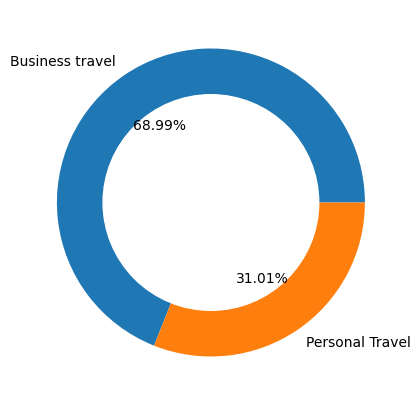

In [175]:
# create data
data = df_train['Type of Travel'].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(5,5))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Aqui se ve claramnete que la mayoria de los viajes se realizan en clase business y en turista, siendo solo un 7,21% los viajero que eligen Eco plus.

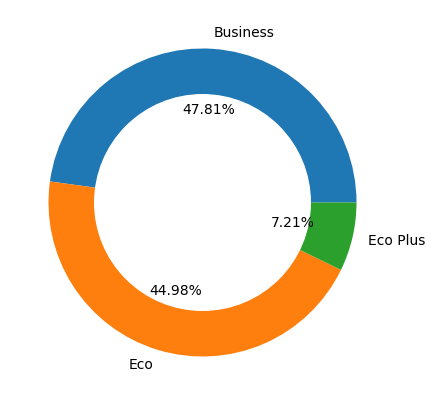

In [176]:
data = df_train['Class'].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(5,5))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Aqui observamos que el target está balanceado

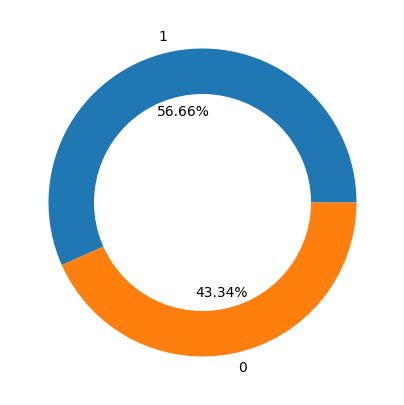

In [189]:
data = df_train['satisfaction'].value_counts()
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.figure(figsize=(5,5))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Voy a realizar un mapeo de las columnas catgóricas binarias en Customer Type, Type of Travel y el target satisfaction, tanto en Train como en Test.


In [177]:
df_train['Customer Type'] =  [1 if i == 'Loyal Customer' else 0 for i in df_train['Customer Type']]
df_test['Customer Type'] =  [1 if i == 'Loyal Customer' else 0 for i in df_test['Customer Type']]

df_train['Type of Travel'] =  [1 if i == 'Business travel' else 0 for i in df_train['Type of Travel']]
df_test['Type of Travel'] =  [1 if i == 'Business travel' else 0 for i in df_test['Type of Travel']]
#Target
df_train['satisfaction'] =  [1 if i == 'neutral or dissatisfied' else 0 for i in df_train.satisfaction]
df_test['satisfaction'] =  [1 if i == 'neutral or dissatisfied' else 0 for i in df_test.satisfaction]


In [178]:

df_train.satisfaction.value_counts()

1    58697
0    44897
Name: satisfaction, dtype: int64

In [179]:
df_train[['Customer Type', 'Type of Travel', 'satisfaction']]

,Customer Type,Type of Travel,satisfaction
0,1,0,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,0
...,...,...,...
103899,0,1,1
103900,1,1,0
103901,0,1,1
103902,0,1,1


#### Para class voy a realizar un get dummies, reindexo las columnas para poner el target al final del dataframe  y guardar los  csv para empezar con la elección de Modelos.

In [180]:
from sklearn.preprocessing import OneHotEncoder
dummy_df_train = pd.get_dummies(df_train, prefix=['Class'])
dummy_df_train

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,13,0,460,3,4,3,1,5,3,...,4,4,5,5,25,18,1,0,0,1
1,0,25,1,235,3,2,3,3,1,3,...,3,1,4,1,1,6,1,1,0,0
2,1,26,1,1142,2,2,2,2,5,5,...,4,4,4,5,0,0,0,1,0,0
3,1,25,1,562,2,5,5,5,2,2,...,3,1,4,2,11,9,1,1,0,0
4,1,61,1,214,3,3,3,3,4,5,...,4,3,3,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,23,1,192,2,1,2,3,2,2,...,4,2,3,2,3,0,1,0,1,0
103900,1,49,1,2347,4,4,4,4,2,4,...,5,5,5,4,0,0,0,1,0,0
103901,0,30,1,1995,1,1,1,3,4,1,...,4,5,5,4,7,14,1,1,0,0
103902,0,22,1,1000,1,1,1,5,1,1,...,1,5,4,1,0,0,1,0,1,0


In [181]:
dummy_df_test = pd.get_dummies(df_test, prefix=['Class'])
dummy_df_test

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,52,1,160,5,4,3,4,3,4,...,5,2,5,5,50,44,0,0,1,0
1,1,36,1,2863,1,1,3,1,5,4,...,4,3,4,5,0,0,0,1,0,0
2,0,20,1,192,2,0,2,4,2,2,...,3,2,2,2,0,0,1,0,1,0
3,1,44,1,3377,0,0,0,2,3,4,...,1,3,1,4,0,6,0,1,0,0
4,1,49,1,1182,2,3,4,3,4,1,...,2,4,2,4,0,20,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0,34,1,526,3,3,3,1,4,3,...,4,4,5,4,0,0,1,1,0,0
25972,1,23,1,646,4,4,4,4,4,4,...,5,5,5,4,0,0,0,1,0,0
25973,1,17,0,828,2,5,1,5,2,1,...,4,5,4,2,0,0,1,0,1,0
25974,1,14,1,1127,3,3,3,3,4,4,...,5,4,5,4,0,0,0,1,0,0


Aqui al realizar este get dummy tengo un 'dummy variable trap' ya que es redundante, de las tres yo eliminaría la Clase Eco  Plus, que ya vi anteriromente que solo era el 7,21%. 
También aqui suma el hecho que hay una fuerte corerlacion entre estas dos columnas:  Departure Delay in Minutes, Arrival Delay in Minutes. Es normal que haya correlación ya que la mayoría de las veces los minutos retrasados puede ser parecidos, aunque algunas veces no quiere decir que un retraso en la salida tiene que conllevar un retraso a la llegada y viceversa.

Asi que para salir de dudas saqué las features importance con Random forest y con selectKbest, como resultado coincidía que las cinco columnas finales eran las mismas, aún así apliqué todos los modelos con 23 columnas y luego con 18 quitando las cinco menos importante, dando como resultado el mismo score, pero mucho más rápido en respuesta cada modelo.


In [234]:
df_train[['Class_Business',	'Class_Eco', 'Class_Eco Plus']]

,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
103899,0,1,0
103900,1,0,0
103901,1,0,0
103902,0,1,0



Aqui estan las columnas y las cinco eliminadas.

In [235]:
fi_rf_22 = pd.read_csv('../data/csv_data/fi_rf_22')
fi_rf_22

,Score,Feature
0,0.2003,Online boarding
1,0.1386,Class_Business
2,0.1292,Inflight wifi service
3,0.1084,Type of Travel
4,0.0767,Class_Eco
5,0.0708,Inflight entertainment
6,0.0580,Seat comfort
7,0.0407,Leg room service
8,0.0307,Ease of Online booking
9,0.0271,On-board service


In [236]:
fi_skbest_22 = pd.read_csv('../data/csv_data/fi_skbest_22')
fi_skbest_22

,column,score
0,Class_Business,35263.686115
1,Online boarding,35170.633424
2,Class_Eco,26477.193754
3,Type of Travel,26156.918063
4,Inflight entertainment,19521.615473
5,Seat comfort,14378.120330
6,On-board service,12020.742510
7,Leg room service,11265.609897
8,Cleanliness,10628.854761
9,Flight Distance,10164.144626


In [241]:
fi_rf_22.tail()

,Score,Feature
18,0.0048,Departure/Arrival time convenient
19,0.0028,Gate location
20,0.0021,Class_Eco Plus
21,0.0016,Arrival Delay in Minutes
22,0.0003,Departure Delay in Minutes


In [242]:
fi_skbest_22.tail()

,column,score
18,Class_Eco Plus,1165.724305
19,Arrival Delay in Minutes,344.619158
20,Departure/Arrival time convenient,277.829708
21,Departure Delay in Minutes,265.019573
22,Gate location,0.020922


In [182]:
dummy_df_train.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

Aqui elimino y reordeno las columnas para poner el target en la última posición y lo grabo en el csv.

In [245]:
df_train = dummy_df_train.reindex(columns=['Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 
       'Ease of Online booking',  'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
        'Class_Business', 'Class_Eco', 'satisfaction'])

In [246]:
df_test = dummy_df_test.reindex(columns=['Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 
       'Ease of Online booking',  'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
        'Class_Business', 'Class_Eco','satisfaction'])

In [247]:
#df_train.to_csv('../data/processed/df_train.csv', index=False)
#df_test.to_csv('../data/processed/df_test.csv', index=False)

In [248]:
df_train.iloc[::,:18:]

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Class_Business,Class_Eco
0,1,13,0,460,3,3,5,3,5,5,4,3,4,4,5,5,0,0
1,0,25,1,235,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,1,26,1,1142,2,2,5,5,5,5,4,3,4,4,4,5,1,0
3,1,25,1,562,2,5,2,2,2,2,2,5,3,1,4,2,1,0
4,1,61,1,214,3,3,4,5,5,3,3,4,4,3,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,23,1,192,2,2,2,2,2,2,3,1,4,2,3,2,0,1
103900,1,49,1,2347,4,4,2,4,5,5,5,5,5,5,5,4,1,0
103901,0,30,1,1995,1,1,4,1,5,4,3,2,4,5,5,4,1,0
103902,0,22,1,1000,1,1,1,1,1,1,4,5,1,5,4,1,0,1


In [249]:
df_train.iloc[::,-1]

0         1
1         1
2         0
3         1
4         0
         ..
103899    1
103900    0
103901    1
103902    1
103903    1
Name: satisfaction, Length: 103594, dtype: int64